In [48]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
path = "D:\E courses\Data Science\Basic python\Datasets\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"
filenames = os.listdir(path)

In [12]:
all_month_data = pd.DataFrame()
for file in filenames:
    month_data = pd.read_csv(fr'{path}\{file}')
    all_month_data = pd.concat([all_month_data,month_data])
all_month_data    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Data Overview:


In [14]:
# all_month_data.to_csv(fr'{path}\Sales.csv')
all_month_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


# Data Cleaning:


In [33]:
all_month_data['Month'] = all_month_data['Order Date'].str[:2]
all_month_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [34]:
all_data=all_month_data.dropna()

In [35]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [36]:
all_data["Month"].str.replace("[0-9]","").unique()

<ipython-input-36-44c298ca5433>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  all_data["Month"].str.replace("[0-9]","").unique()


array(['', 'Or'], dtype=object)

In [38]:
all_data = all_data[all_data['Month'].str[:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [39]:
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [42]:
all_data['Month'] = all_data['Month'].astype('int')
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [43]:
#Conversion To Float
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('float')
all_data['Price Each'] = all_data['Price Each'].astype('float')

#pCalculated Column
all_data['TSV'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,TSV
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Q. What is the best month for sale? How much was earned?

In [54]:
result = all_data.groupby('Month')['TSV'].sum()
result

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: TSV, dtype: float64

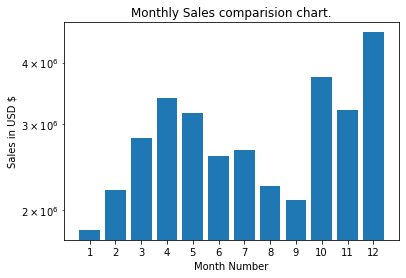

A: December is the best month for sales, followed by October.
The reason could be festive sales where the ecommerce industry witnesses a major sales boost.


In [61]:
months = range(1,13)
plt.bar(months,result)
plt.xticks(months)
plt.title('Monthly Sales comparision chart.')
plt.xlabel('Month Number')
plt.ylabel('Sales in USD $')
plt.yscale("log")
plt.show()
print(f"""A: December is the best month for sales, followed by October.
The reason could be festive sales where the ecommerce industry witnesses a major sales boost.""")

# What city sold the most product?

In [62]:
all_data['City'] = all_data['Purchase Address'].str.split(',',expand=True)[1]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,TSV,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


City
 Austin           11153.0
 Portland         14053.0
 Seattle          16553.0
 Atlanta          16602.0
 Dallas           16730.0
 Boston           22528.0
 New York City    27932.0
 Los Angeles      33289.0
 San Francisco    50239.0
Name: Quantity Ordered, dtype: float64


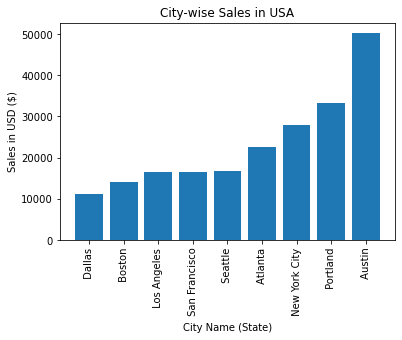

A: San Francisco has the highest sales in US, followed by Los Angeles.


In [76]:
#City sales group by
city = all_data['City'].unique()
citywise_sales = all_data.groupby('City')['Quantity Ordered'].sum().sort_values()
print(citywise_sales)
plt.bar(city, citywise_sales)
plt.xticks(city, rotation='vertical', size=10)
plt.xlabel('City Name (State)')
plt.ylabel('Sales in USD ($)')
plt.title('City-wise Sales in USA')
plt.show()

print('A: San Francisco has the highest sales in US, followed by Los Angeles.')

In [79]:
all_data['State'] = all_data['Purchase Address'].str.split(',',expand=True)[2]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,TSV,City,State
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,CA 90001
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,CA 94016
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,CA 94016
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,CA 94016


# Q. What time should we display advertisements to maximise for product purchase?

In [81]:
# Convert order Date in Datetime Format:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,TSV,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,CA 90001,20,56
11682,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,CA 94016,16,0
11683,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,CA 94016,7,39
11684,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,CA 94016,17,30


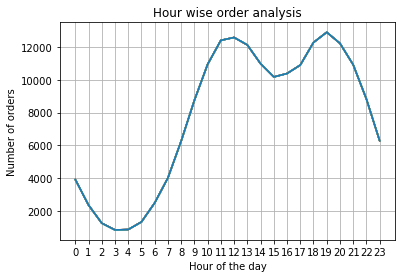

A: 12pm and 7pm is probably the best time to advertise to maximise product purchase.


In [83]:
 #List comprehension to match order of data #Create list of 24 hours for analysis
hours = [hour for hour, df in all_data.groupby('Hour')] 
#count the orders each hours of the day
plt.plot(hours, all_data.groupby(['Hour']).count()) 
plt.xticks(hours)
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders')
plt.grid()
plt.title('Hour wise order analysis')
plt.show()

print('A: 12pm and 7pm is probably the best time to advertise to maximise product purchase.')
# print(all_data.head().to_string())


# Q. What products are most often sold together?

In [92]:
#Create a new df with duplicated order. Duplicated order indicates order with two or more products. keep=False to use all occurances
df = all_data[all_data['Order ID'].duplicated(keep=False)]
# #Create a new column, group by orderid and combine products in a single cell comma separated
df['Best Combo'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# #Remove duplicated entry and show only orderid and combo column results
df = df[['Order ID', 'Best Combo']].drop_duplicates()
#Count the occurances
from itertools import combinations
from collections import Counter

#count the combination of 2 products using the above mentioned libs.
count = Counter()
#iterate through each cell, split products in a list and count
for row in df['Best Combo']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) #group of 2. Change to 3 for group of 3s
count


<ipython-input-92-785a9bd2ca63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Best Combo'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


Counter({('Google Phone', 'Wired Headphones'): 414,
         ('Google Phone', 'USB-C Charging Cable'): 987,
         ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 27,
         ('AAA Batteries (4-pack)', 'Google Phone'): 11,
         ('Lightning Charging Cable', 'USB-C Charging Cable'): 58,
         ('Apple Airpods Headphones', 'ThinkPad Laptop'): 9,
         ('Bose SoundSport Headphones', 'AAA Batteries (4-pack)'): 37,
         ('34in Ultrawide Monitor', 'Google Phone'): 2,
         ('iPhone', 'Lightning Charging Cable'): 1005,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('Bose SoundSport Headphones', 'Wired Headphones'): 53,
         ('AAA Batteries (4-pack)', '27in FHD Monitor'): 22,
         ('USB-C Charging Cable', 'AAA Batteries (4-pack)'): 45,
         ('iPhone', 'Wired Headphones'): 447,
         ('iPhone', '27in 4K Gaming Monitor'): 6,
         ('ThinkPad Laptop', 'AAA Batteries (4-pack)'): 16,
         ('iPhone', 'Apple Airpods Headph

In [94]:
#Most common occurance
for key, value in count.most_common(10):
    print(key, value)
    
print("""\nA: iPhone along with Lightning Charging Cable is best selling product combination.
      \n B:Google Phone with USB-C Charging Cable second most selling product combination.""")

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92

A: iPhone along with Lightning Charging Cable is best selling product combination.
      
 B:Google Phone with USB-C Charging Cable second most selling product combination


# What Three Products are bought together most Frequently ?

In [102]:
from itertools import combinations
from collections import Counter

count = Counter()
row_list = []
for row in df['Best Combo']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

In [105]:
#Most common occurance
for key, value in count.most_common(10):
    print(key, value)
    
print("""\nA: Google Phone, USB-C Charging Cable and Wired Headphones are best selling in 3 product combination.
      \nB: iPhone, Lightning Charging Cable and  Wired Headphones second most selling  in 3 product combination.""")

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5

A: Google Phone, USB-C Charging Cable and Wired Headphones are best selling in 3 product combination.
      
B: iPhone, Lightning Charging Cable and  Wired Headphones second most selling  in 3 product combination.


# Q. What product sold the most? Why do you think it sold the most?

<AxesSubplot:xlabel='Product'>

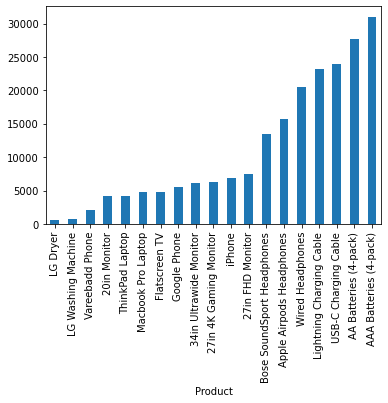

In [106]:
all_data.groupby('Product')['Quantity Ordered'].sum().sort_values().plot(kind='bar')

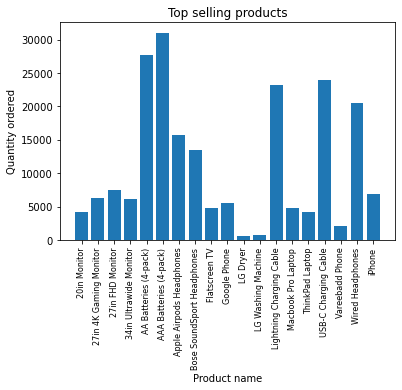

<ipython-input-110-c5add32926da>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


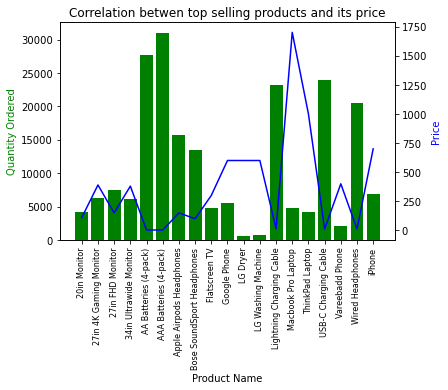

A: The top selling product is 'AAA Batteries'.
 
The top selling products seem to have a correlation with the price of the product.
 
The cheaper the product higher the quantity ordered and vice versa.


In [110]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product name')
plt.ylabel('Quantity ordered')
plt.title('Top selling products')
plt.show()

#Find price of the best selling products
prices = all_data.groupby('Product').mean()['Price Each']

#Find corelation between best products and their price
#Add the second axis at y for price comparision in the same graph
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-') #Second axis on y

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax1.title.set_text('Correlation betwen top selling products and its price')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()
print("""A: The top selling product is 'AAA Batteries'.\n 
The top selling products seem to have a correlation with the price of the product.\n 
The cheaper the product higher the quantity ordered and vice versa.""")